In [569]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
import numpy as np

In [570]:
antiviral=pd.read_csv("Antiviral/antiviral_nomod_canon.csv")
hlp_10=pd.read_csv("HLP/HLP_10.csv")
hlp_16=pd.read_csv("HLP/HLP_16.csv")
peplife=pd.read_csv("PEPLIFE/PEP_LIFE_nomod_canon.csv")
peptherdia=pd.read_csv("PepTherDia/PepTherDia_nomod_canon.csv")
plifepred=pd.read_csv("Plifepred/plifepred_nomod_canon.csv")
serum=pd.read_csv("Serum/serum_nomod_canon.csv")

In [571]:
dataframes = {
    "Antiviral": antiviral,
    "HLP_10": hlp_10,
    "HLP_16": hlp_16,
    "PepLife": peplife,
    "PlifePred": plifepred,
    "Serum": serum
}

In [572]:
'''
dict_check = { "sequence": [], "Antiviral": [], "HLP": [], "PepLife": [], "PlifePred": [], "Serum": [] }
index=0
#Recorre cada dataframe
for key in dataframes:
    #Recorre cada secuencia de cada dataframe
    for j in range(len(dataframes[key])):
        #Si la secuencia no esta en el diccionario, la agrega y le asigna 0 a cada key
        sequence = dataframes[key]['sequence'][j]
        if sequence not in dict_check['sequence']:
            dict_check['sequence'].append(sequence)
            for k in dict_check.keys():
                if k != 'sequence':
                    dict_check[k].append(0)
        #Si la secuencia ya esta en el diccionario o se acaba de agregar, le suma 1 a la key correspondiente
        index = dict_check['sequence'].index(sequence)
        dict_check[key][index] += 1
df_check = pd.DataFrame(dict_check)
'''

'\ndict_check = { "sequence": [], "Antiviral": [], "HLP": [], "PepLife": [], "PlifePred": [], "Serum": [] }\nindex=0\n#Recorre cada dataframe\nfor key in dataframes:\n    #Recorre cada secuencia de cada dataframe\n    for j in range(len(dataframes[key])):\n        #Si la secuencia no esta en el diccionario, la agrega y le asigna 0 a cada key\n        sequence = dataframes[key][\'sequence\'][j]\n        if sequence not in dict_check[\'sequence\']:\n            dict_check[\'sequence\'].append(sequence)\n            for k in dict_check.keys():\n                if k != \'sequence\':\n                    dict_check[k].append(0)\n        #Si la secuencia ya esta en el diccionario o se acaba de agregar, le suma 1 a la key correspondiente\n        index = dict_check[\'sequence\'].index(sequence)\n        dict_check[key][index] += 1\ndf_check = pd.DataFrame(dict_check)\n'

In [573]:
'''
correlations1 = []
correlations1_5 = []

for i in range(1000):
    ran1 = random.choice(list(dataframes.keys()))
    ran2 = random.choice(list(dataframes.keys()))
    m1=dataframes[ran1]['half_life_seconds'].sample(100, replace=True)
    m2=dataframes[ran2]['half_life_seconds'].sample(100, replace=True)
    m1, m2 = m1.reset_index(drop=True), m2.reset_index(drop=True)
    corr = m1.corr(m2)
    corr2= m2.corr(m2, method='spearman')
    correlations1.append(corr)
    correlations1_5.append(corr2)

correlations2 = []
correlations2_5 = []
for i in range(1000):
    serie1 = []
    serie2 = []
    for j in range(1000):
        ran1 = random.choice(list(dataframes.keys()))
        ran2 = random.choice(list(dataframes.keys()))
        m1=dataframes[ran1]['half_life_seconds'].sample(1, replace=True)
        m2=dataframes[ran2]['half_life_seconds'].sample(1, replace=True)
        m1, m2 = m1.reset_index(drop=True), m2.reset_index(drop=True)
        serie1.append(m1)
        serie2.append(m2)
    serie1 = pd.Series(serie1)
    serie2 = pd.Series(serie2)
    corr = serie1.corr(serie2)
    corr2 = serie1.corr(serie2, method='spearman')
    correlations2.append(corr)
    correlations2_5.append(corr2)
    '''

"\ncorrelations1 = []\ncorrelations1_5 = []\n\nfor i in range(1000):\n    ran1 = random.choice(list(dataframes.keys()))\n    ran2 = random.choice(list(dataframes.keys()))\n    m1=dataframes[ran1]['half_life_seconds'].sample(100, replace=True)\n    m2=dataframes[ran2]['half_life_seconds'].sample(100, replace=True)\n    m1, m2 = m1.reset_index(drop=True), m2.reset_index(drop=True)\n    corr = m1.corr(m2)\n    corr2= m2.corr(m2, method='spearman')\n    correlations1.append(corr)\n    correlations1_5.append(corr2)\n\ncorrelations2 = []\ncorrelations2_5 = []\nfor i in range(1000):\n    serie1 = []\n    serie2 = []\n    for j in range(1000):\n        ran1 = random.choice(list(dataframes.keys()))\n        ran2 = random.choice(list(dataframes.keys()))\n        m1=dataframes[ran1]['half_life_seconds'].sample(1, replace=True)\n        m2=dataframes[ran2]['half_life_seconds'].sample(1, replace=True)\n        m1, m2 = m1.reset_index(drop=True), m2.reset_index(drop=True)\n        serie1.append(m1)\

In [574]:
#Se agrega la columna de la fuente de la secuencia
for key in dataframes:
    dataframes[key]['source'] = key

#Se concatenan todos los dataframes
df_concat=pd.concat(dataframes.values(), ignore_index=True)
#Se agrupan las secuencias y se cuentan cuantas veces aparece en cada fuente
df_check=df_concat.groupby(['sequence','source']).size().unstack(fill_value=0)

In [575]:
df_check

source,Antiviral,HLP_10,HLP_16,PepLife,PlifePred,Serum
sequence,,,,,,
AAAMSQVTN,1,0,0,0,0,0
AACEVAKNLNESLIDLQELGKYEQYIKW,1,0,0,0,0,0
AADQARELIN,0,1,0,0,0,0
AADQARELINSWVESQ,0,0,1,0,0,0
AAGAVVNDL,1,0,0,0,0,0
...,...,...,...,...,...,...
YTSLIHSLIEEWQNQQEKNEQELLELDKWASLWNWF,3,0,0,0,0,0
YTSLIHSLIEEYQNQQEKNEQELLELDKWASLWNWF,3,0,0,0,0,0
YVREHGVPIHADKYFEQVLK,3,0,0,0,0,0


In [576]:
df_concat

,sequence,half_life_seconds,experimental_characteristics,hl_category,source
0,AAAMSQVTN,15840.0,Mammalian,Medium,Antiviral
1,AACEVAKNLNESLIDLQELGKYEQYIKW,15840.0,Mammalian,Medium,Antiviral
2,AAGAVVNDL,15840.0,Mammalian,Medium,Antiviral
3,AAHLIDALYAEFLGGRVLTT,15840.0,Mammalian,Medium,Antiviral
4,AAHLIDALYAEFLGGRVLTTPVVHRALFYASAVLRQPFLAGVPSA,15840.0,Mammalian,Medium,Antiviral
...,...,...,...,...,...
3037,SLRRSSCFGGRMDRIGAQSGLGCNSFRY,156.0,human serum,Low,Serum
3038,MCMPCFTTDHQMARKCDDCCGGKGRGKCYGPQCLCR,50400.0,mouse,High,Serum
3039,KRFKKFFKKVKKSVKKRLKKIFKKPMVIGVTIPF,4260.0,human serum,Low,Serum
3040,KRFKKFFKKVKKSV,1260.0,human serum,Low,Serum


In [577]:
df_concat.columns

Index(['sequence', 'half_life_seconds', 'experimental_characteristics',
       'hl_category', 'source'],
      dtype='object')

In [578]:
antiviral=df_concat[df_concat['source']=='PlifePred']

In [579]:
grouped=antiviral.groupby(['experimental_characteristics', 'hl_category']).size()

In [580]:
grouped

experimental_characteristics  hl_category
mammalian blood               High            23
                              Low            148
                              Medium           5
dtype: int64

In [581]:
df_concat.value_counts('source')

source
Antiviral    2268
PepLife       206
HLP_10        189
HLP_16        186
PlifePred     176
Serum          17
Name: count, dtype: int64

In [582]:
#se crea un diccionario y una variable para guardar las keys
corr_data=[]
keys = list(dataframes.keys())
df_values=pd.DataFrame()
for i in range(1000):
#Se recorren las keys y se guardan los valores de half_life_seconds en un diccionario
    for j in range(len(keys)):
        df=df_concat[df_concat['source']==keys[j]]
        df_values[keys[j]] = shuffle(df['half_life_seconds'].values, random_state=i, n_samples=17)
        #Se realiza el resample de los valores (con reemplazo)
        #df_values[keys[j]] = df['half_life_seconds'].sample(n=100, replace=True, random_state=i).values
    corr_data.append(df_values.corr())
    #corr_iter = df_values.corr()
    #if sum_correlations is None:
     #   sum_correlations = corr_iter
    #else:
     #   sum_correlations += corr_iter

In [583]:
df_correlation=pd.DataFrame
df_correlation=pd.concat(corr_data)
df_correlation=df_correlation.sort_index()


In [584]:
#avg_correlation = sum_correlations / 1000
#avg_correlation

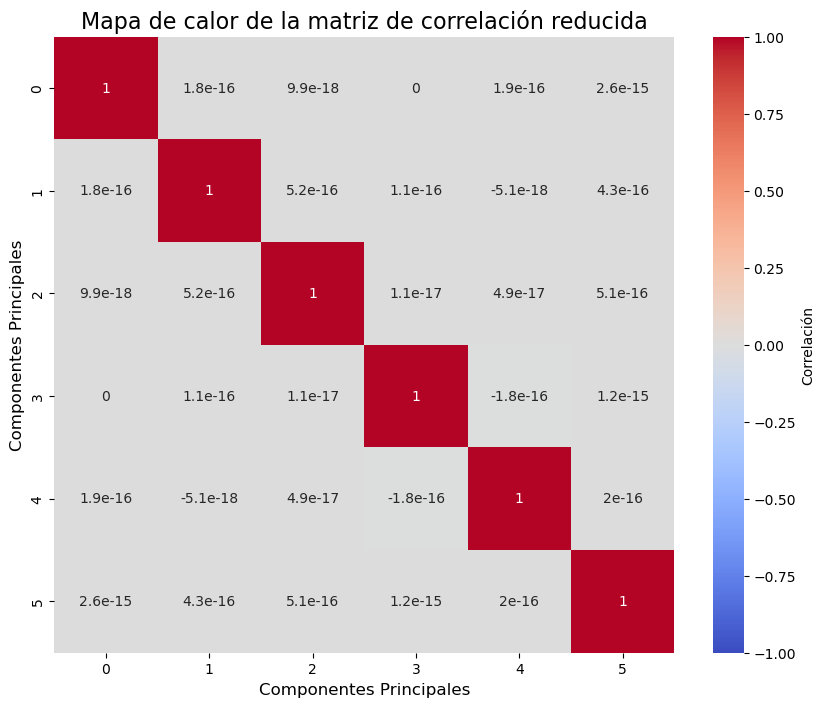

In [585]:
from sklearn.decomposition import PCA

# Reducir la dimensionalidad usando PCA antes de calcular las correlaciones
pca = PCA(n_components=len(keys))  # Ajustar a 6 porque hay 6 variables
reduced_data = pca.fit_transform(df_correlation)

# Calcular la matriz de correlación en el espacio reducido
df_correlation_reduced = pd.DataFrame(np.corrcoef(reduced_data.T))

# Ahora puedes crear un gráfico de la nueva matriz de correlación reducida
plt.figure(figsize=(10, 8))
sns.heatmap(df_correlation_reduced, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, cbar_kws={'label': 'Correlación'})

plt.title('Mapa de calor de la matriz de correlación reducida', fontsize=16)
plt.xlabel('Componentes Principales', fontsize=12)
plt.ylabel('Componentes Principales', fontsize=12)
plt.show()



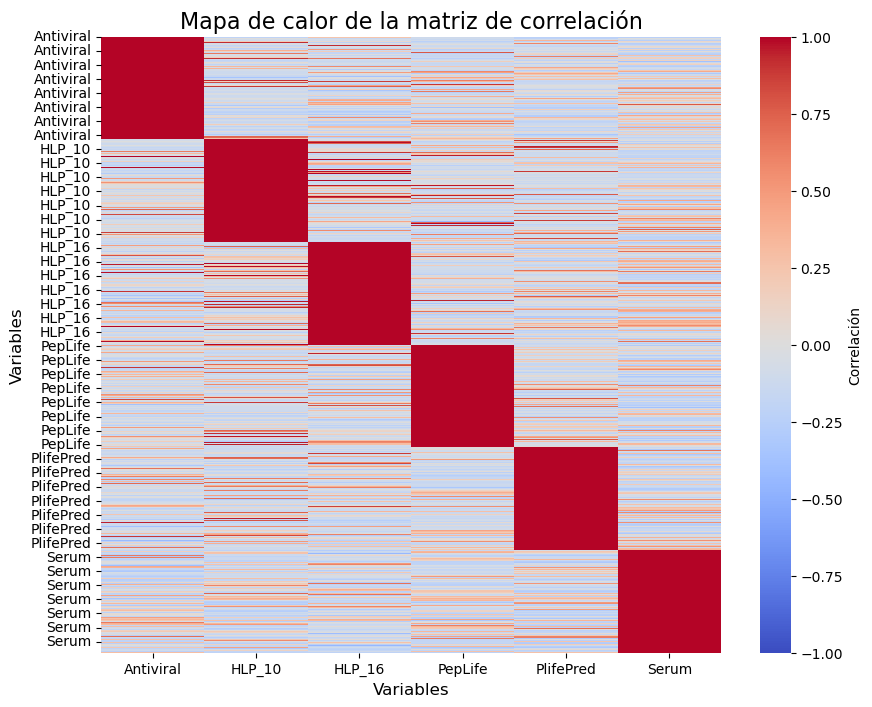

In [586]:
plt.figure(figsize=(10, 8))

# Crear el mapa de calor usando seaborn
sns.heatmap(df_correlation, annot=False, cmap='coolwarm', vmin=-1, vmax=1, center=0, cbar_kws={'label': 'Correlación'})

# Títulos y etiquetas
plt.title('Mapa de calor de la matriz de correlación', fontsize=16)
plt.xlabel('Variables', fontsize=12)
plt.ylabel('Variables', fontsize=12)

# Mostrar el gráfico
plt.show()

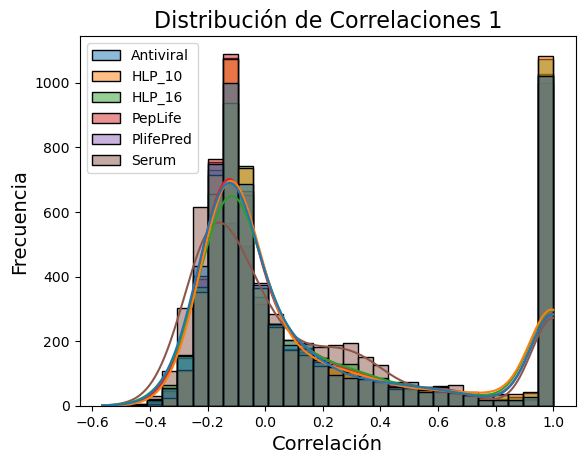

In [587]:
sns.histplot(df_correlation, kde=True, bins=30, color='blue')

# Añadir títulos y etiquetas
plt.title('Distribución de Correlaciones 1', fontsize=16)
plt.xlabel('Correlación', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)

# Mostrar el gráfico
plt.show()

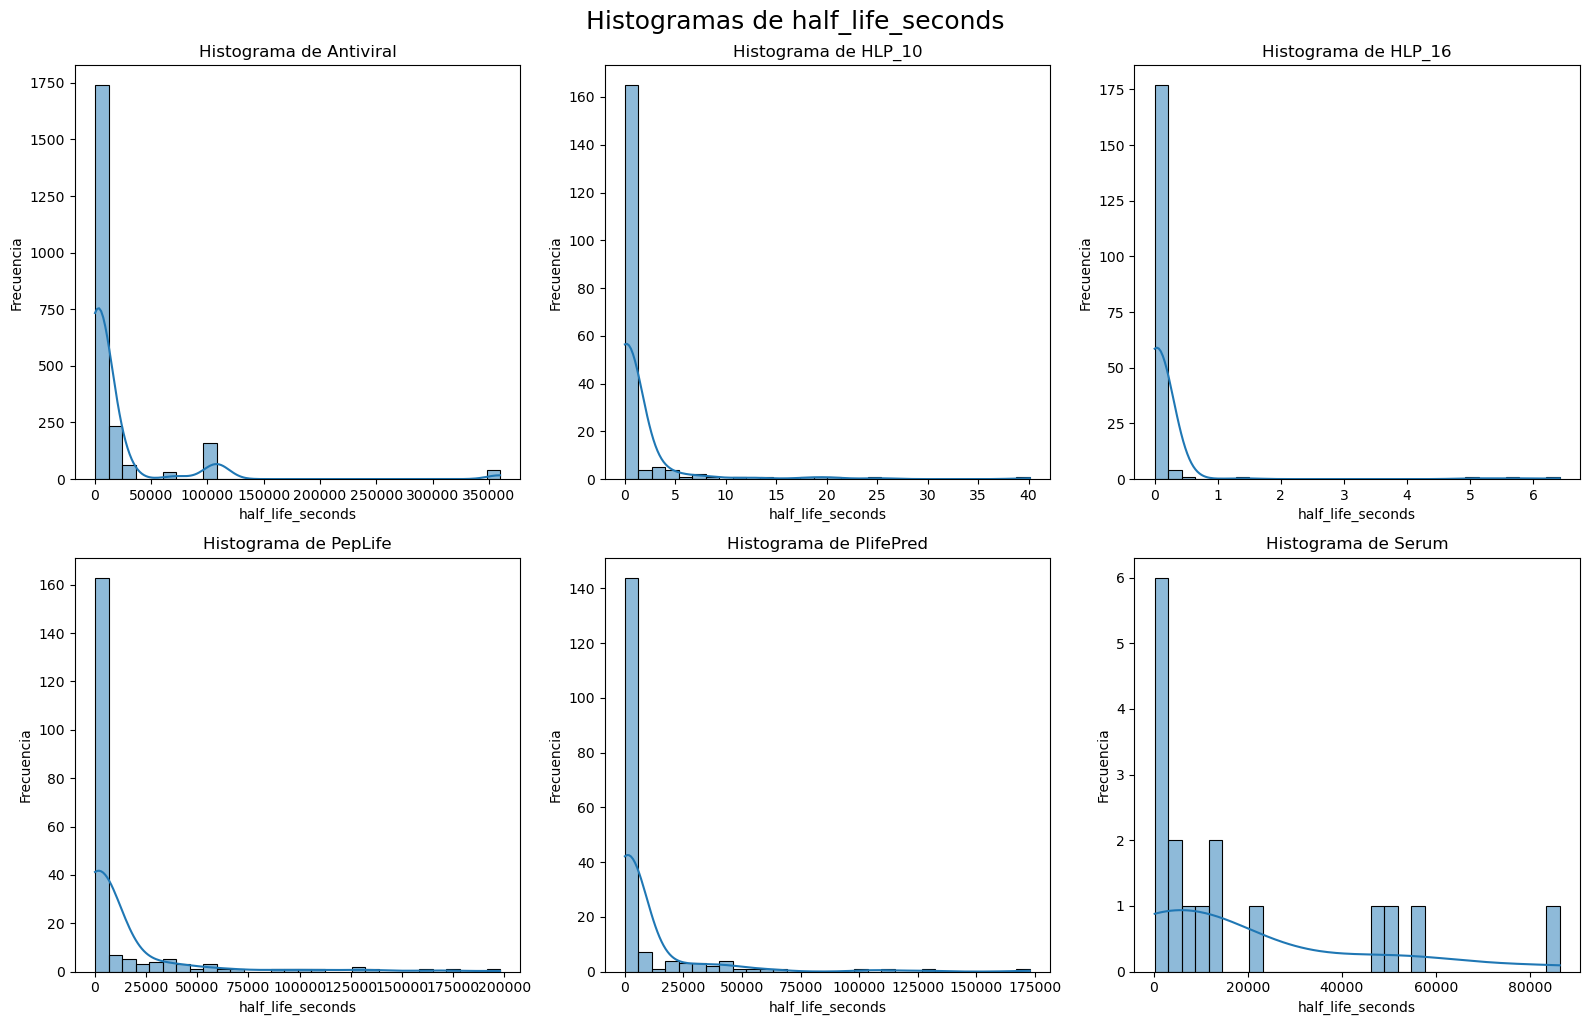

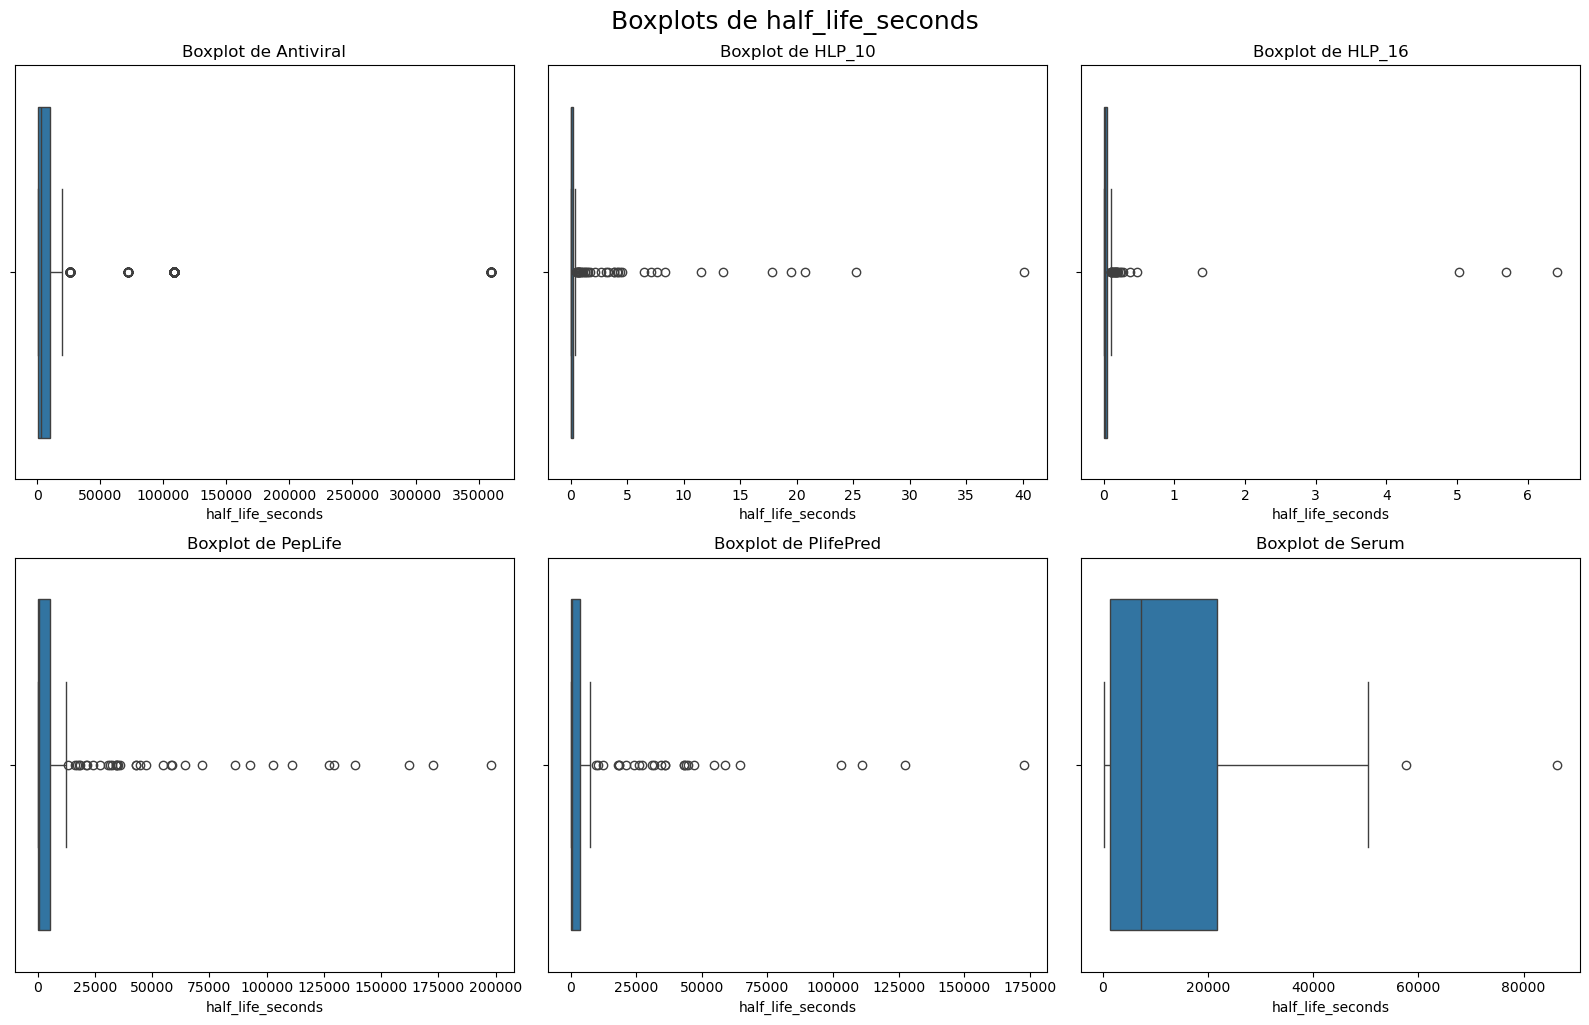

In [588]:
# Extraer la columna `half_life_seconds` solo si existe y no está vacía
columns_to_plot = {
    name: df["half_life_seconds"] 
    for name, df in dataframes.items() 
    if "half_life_seconds" in df.columns and not df["half_life_seconds"].dropna().empty
}

# Configuración de subplots: 2 filas arriba, 3 abajo (en total 2x3 = 6 espacios)
n_cols = 3
n_rows = 2

# Crear figura para los histogramas
plt.figure(figsize=(16, 10))
for i, (name, column) in enumerate(columns_to_plot.items(), 1):
    plt.subplot(n_rows, n_cols, i)
    sns.histplot(column, kde=True, bins=30)
    plt.title(f"Histograma de {name}")
    plt.xlabel("half_life_seconds")
    plt.ylabel("Frecuencia")
plt.tight_layout()
plt.suptitle("Histogramas de half_life_seconds", fontsize=18, y=1.02)
plt.show()

# Crear figura para los boxplots
plt.figure(figsize=(16, 10))
for i, (name, column) in enumerate(columns_to_plot.items(), 1):
    plt.subplot(n_rows, n_cols, i)
    sns.boxplot(x=column)
    plt.title(f"Boxplot de {name}")
    plt.xlabel("half_life_seconds")
plt.tight_layout()
plt.suptitle("Boxplots de half_life_seconds", fontsize=18, y=1.02)
plt.show()